Pygame

   Pygame adalah modul cross-platform dari Python dirancang untuk membuat game. Modulnya dirancang untuk menjadi sederhana, mudah digunakan, dan menyenangkan, untuk pemula yang ingin membuat game disarankan menggunakan pygame karena cukup mudah dipahami
   

PROSES INSTALLASI PYGAME

Untuk Install Pygame Cukum Mudah sekali kalian tinggal buka Cmd lalu ketikan
pip Install pygame
kemudian tunggu proses penginstallan 

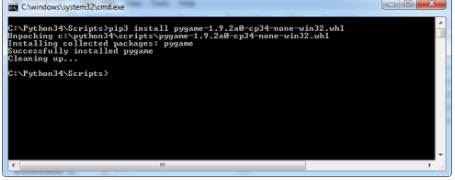

untuk gambarnya seperti diatas

nah Untuk melihat apakah pygame sudah terinstall dengan benar silakan anda import librarynya melalui idle cranya

1. Pertama buka idle kalian

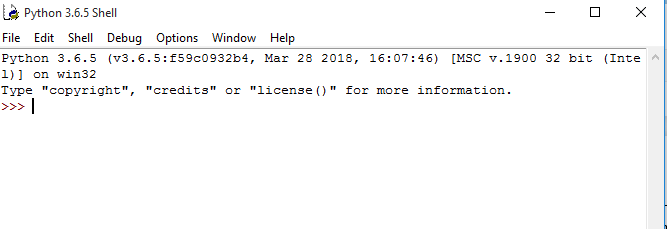

2. kemudian ketikan import Pygame lalu tekan enter

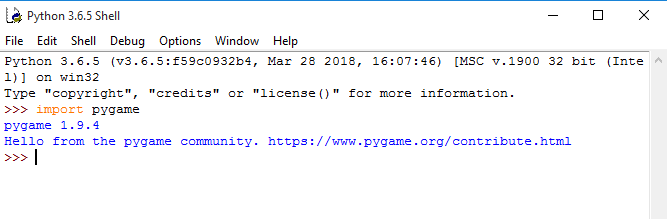

jika sudah terinstall dengan benar maka tampilannya akan seperti diatas jika masih salah tampilannya seperti gambar dibawah

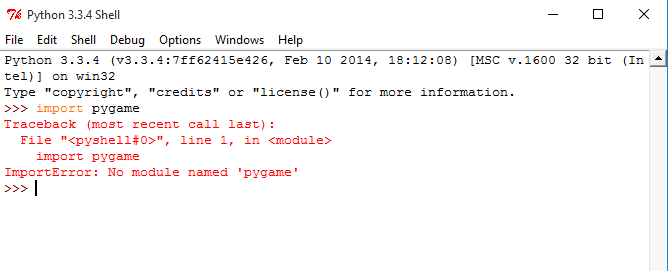


Diagram Kelas game pong with pygame

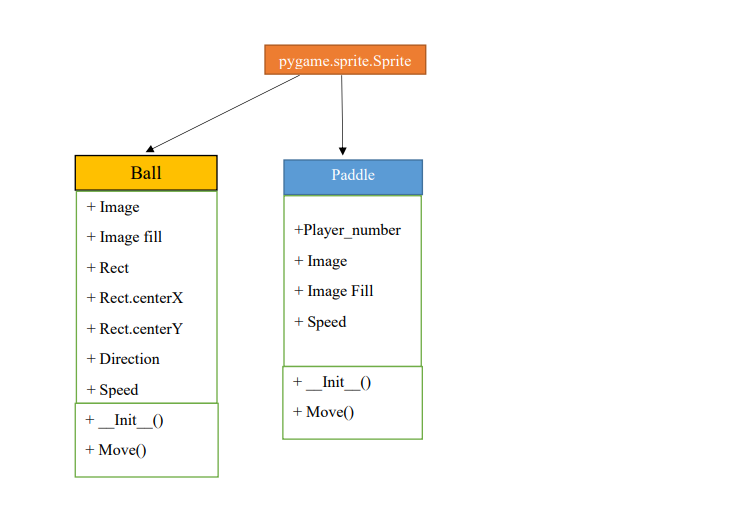

Konsep OOP yang digunakan adalah semua kelas yang ada pada program inheritance dari constructor kelas parent(kelas sprite) dari modul pygame

contohnya
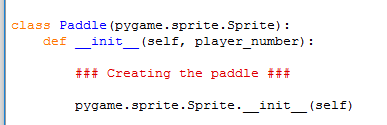

PENJELASAN OOP

1. class paddle
  class ini digunakan untuk membuat paddle dari game pong yang di gunakan buat memantulkan bola pong
  Di dalam kelas ini terdapat attribute dan method
  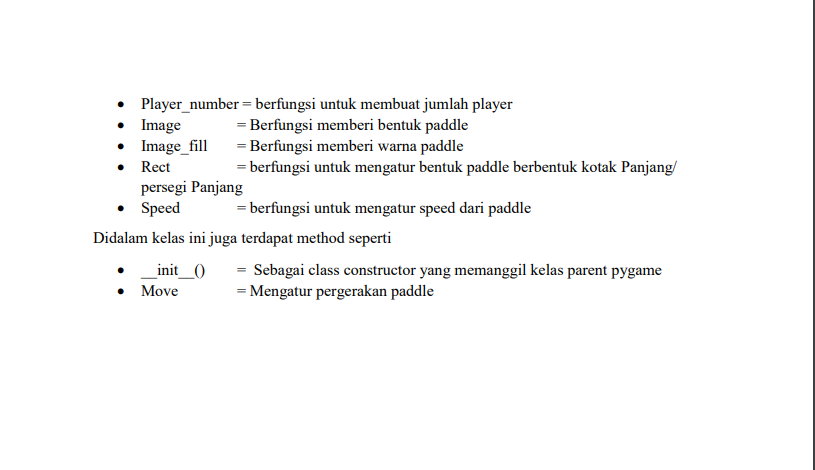
  
2. class ball
  class ini digunakan untuk membuat sebuah bola pong untuk game yang dibuat
  didalam kelas ini terdapat adtribut dan method
  
  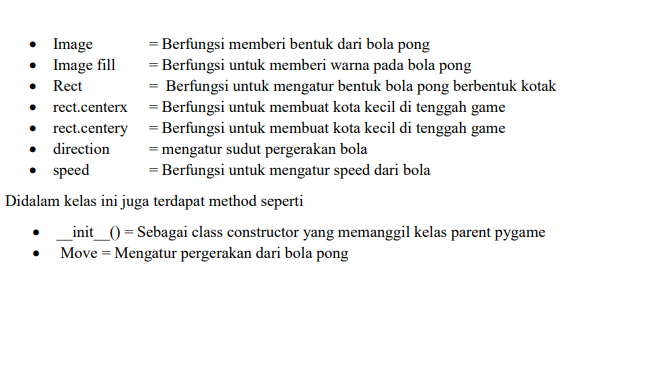

In [ ]:
Source code pong with pygame

import pygame, sys, time
from pygame.locals import *
from random import randint

pygame.init()

WINDOW_WIDTH = 1024
WINDOW_HEIGHT = 600

clock = pygame.time.Clock()

player1_win = False
player2_win = False


### Paddle Stuff ###

PADDLE_SPEED = 10

UP1 = False
DOWN1 = False
NO_MOVEMENT1 = True

UP2 = False
DOWN2 = False
NO_MOVEMENT2 = True



### Ball Stuff ###

UPLEFT = 0
DOWNLEFT = 1
UPRIGHT = 2
DOWNRIGHT = 3


### Music ###

pygame.mixer.music.load("endofline.ogg")
sound_effect = pygame.mixer.Sound("beep.wav")




### colors ###
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)



### Creating the main surface ###

main_surface = pygame.display.set_mode((WINDOW_WIDTH, WINDOW_HEIGHT), 0, 32)
surface_rect = main_surface.get_rect()






class Paddle(pygame.sprite.Sprite):
    def __init__(self, player_number):

        ### Creating the paddle ###
        
        pygame.sprite.Sprite.__init__(self)

        self.player_number = player_number
        self.image = pygame.Surface([10, 100])
        self.image.fill(WHITE)
        self.rect = self.image.get_rect()
        self.speed = 8


        ### Establishing the location of each paddle ##
        
        if self.player_number == 1:
            self.rect.centerx = main_surface.get_rect().left
            self.rect.centerx += 50
        elif self.player_number == 2:
            self.rect.centerx = main_surface.get_rect().right
            self.rect.centerx -= 50
        self.rect.centery = main_surface.get_rect().centery


    def move(self):

        if self.player_number == 1:
            if (UP1 == True) and (self.rect.y > 5):
                self.rect.y -= self.speed
            elif (DOWN1 == True) and (self.rect.bottom < WINDOW_HEIGHT-5):
                self.rect.y += self.speed
            elif (NO_MOVEMENT1 == True):
                pass

        if self.player_number == 2:
            if (UP2 == True) and (self.rect.y > 5):
                self.rect.y -= self.speed
            elif (DOWN2 == True) and (self.rect.bottom < WINDOW_HEIGHT-5):
                self.rect.y += self.speed
            elif (NO_MOVEMENT2 == True):
                pass




class Ball(pygame.sprite.Sprite):
    def __init__(self):
        pygame.sprite.Sprite.__init__(self)

        self.image = pygame.Surface([30, 30])
        self.image.fill(WHITE)
        self.rect = self.image.get_rect()
        self.rect.centerx = surface_rect.centerx
        self.rect.centery = surface_rect.centery
        self.direction = randint(0,3)
        self.speed = 4

    def move(self):
        if self.direction == UPLEFT:
            self.rect.x -= self.speed
            self.rect.y -= self.speed
        elif self.direction == UPRIGHT:
            self.rect.x += self.speed
            self.rect.y -= self.speed
        elif self.direction == DOWNLEFT:
            self.rect.x -= self.speed
            self.rect.y += self.speed
        elif self.direction == DOWNRIGHT:
            self.rect.x += self.speed
            self.rect.y += self.speed

    def change_direction(self):
        if self.rect.y < 0 and self.direction == UPLEFT:
            self.direction = DOWNLEFT
        if self.rect.y < 0 and self.direction == UPRIGHT:
            self.direction = DOWNRIGHT
        if self.rect.y > surface_rect.bottom and self.direction == DOWNLEFT:
            self.direction = UPLEFT
        if self.rect.y > surface_rect.bottom and self.direction == DOWNRIGHT:
            self.direction = UPRIGHT


    
        
        
basic_font = pygame.font.SysFont("Helvetica", 120)
game_over_font_big = pygame.font.SysFont("Helvetica", 72)
game_over_font_small = pygame.font.SysFont("Helvetica", 50)





    

paddle1 = Paddle(1)
paddle2 = Paddle(2)

ball = Ball()

all_sprites = pygame.sprite.RenderPlain(paddle1, paddle2, ball) 


player1_score = 0
player2_score = 0

def paddle_hit():
    if pygame.sprite.collide_rect(ball, paddle2):
        if (ball.direction == UPRIGHT):
            ball.direction = UPLEFT
        elif (ball.direction == DOWNRIGHT):
            ball.direction = DOWNLEFT
        ball.speed += 1
        sound_effect.play()
    elif pygame.sprite.collide_rect(ball, paddle1):
        if (ball.direction == UPLEFT):
            ball.direction = UPRIGHT
        elif (ball.direction == DOWNLEFT):
            ball.direction = DOWNRIGHT
        ball.speed +=1
        sound_effect.play()

    
counter = 0

while True:

    clock.tick(60)

    if (ball.rect.x > WINDOW_WIDTH):
        ball.rect.centerx = surface_rect.centerx
        ball.rect.centery = surface_rect.centery
        ball.direction = randint(0, 1)
        ball.speed = 4
    elif (ball.rect.x < 0):
        ball.rect.centerx = surface_rect.centerx
        ball.rect.centery = surface_rect.centery
        ball.direction = randint(2, 3)
        ball.speed = 4


    for event in pygame.event.get():
        if event.type == QUIT:
            pygame.quit()
            sys.exit()

        if event.type == KEYDOWN:
            if event.key == K_ESCAPE:
                pygame.quit()
                sys.exit()
            
            if event.key == ord('a'):
                UP1 = True
                DOWN1 = False
                NO_MOVEMENT1 = False
            elif event.key == ord('z'):
                UP1 = False
                DOWN1 = True
                NO_MOVEMENT1 = False
                
            elif event.key == ord('j'):
                UP2 = True
                DOWN2 = False
                NO_MOVEMENT2 = False
            elif event.key == ord('m'):
                UP2 = False
                DOWN2 = True
                NO_MOVEMENT2 = False
                
            
        elif event.type == KEYUP:
            if event.key == ord('a') or event.key == ord('z'):
                NO_MOVEMENT1 = True
                DOWN1 = False
                UP1 = False
            elif event.key == ord('j') or event.key == ord('m'):
                NO_MOVEMENT2 = True
                DOWN2 = False
                UP2 = False


    score_board = basic_font.render(str(player1_score) + "           " + str(player2_score), True, WHITE, BLACK) 
    score_board_rect = score_board.get_rect()
    score_board_rect.centerx = surface_rect.centerx 
    score_board_rect.y = 10

    
    

    main_surface.fill(BLACK)

    main_surface.blit(score_board, score_board_rect)

    netx = surface_rect.centerx

    net_rect0 = pygame.Rect(netx, 0, 5, 5)
    net_rect1 = pygame.Rect(netx, 60, 5, 5)
    net_rect2 = pygame.Rect(netx, 120, 5, 5)
    net_rect3 = pygame.Rect(netx, 180, 5, 5)
    net_rect4 = pygame.Rect(netx, 240, 5, 5)
    net_rect5 = pygame.Rect(netx, 300, 5, 5)
    net_rect6 = pygame.Rect(netx, 360, 5, 5)
    net_rect7 = pygame.Rect(netx, 420, 5, 5)
    net_rect8 = pygame.Rect(netx, 480, 5, 5)
    net_rect9 = pygame.Rect(netx, 540, 5, 5)
    net_rect10 = pygame.Rect(netx, 595, 5, 5)
    
    

    pygame.draw.rect(main_surface, WHITE, (net_rect0.left, net_rect0.top, net_rect0.width, net_rect0.height))
    pygame.draw.rect(main_surface, WHITE, (net_rect1.left, net_rect1.top, net_rect1.width, net_rect1.height))
    pygame.draw.rect(main_surface, WHITE, (net_rect2.left, net_rect2.top, net_rect2.width, net_rect2.height))
    pygame.draw.rect(main_surface, WHITE, (net_rect3.left, net_rect3.top, net_rect3.width, net_rect3.height))
    pygame.draw.rect(main_surface, WHITE, (net_rect4.left, net_rect4.top, net_rect4.width, net_rect4.height))
    pygame.draw.rect(main_surface, WHITE, (net_rect5.left, net_rect5.top, net_rect5.width, net_rect5.height))
    pygame.draw.rect(main_surface, WHITE, (net_rect6.left, net_rect6.top, net_rect6.width, net_rect6.height))
    pygame.draw.rect(main_surface, WHITE, (net_rect7.left, net_rect7.top, net_rect7.width, net_rect7.height))
    pygame.draw.rect(main_surface, WHITE, (net_rect8.left, net_rect8.top, net_rect8.width, net_rect8.height))
    pygame.draw.rect(main_surface, WHITE, (net_rect9.left, net_rect9.top, net_rect9.width, net_rect9.height))
    pygame.draw.rect(main_surface, WHITE, (net_rect10.left, net_rect10.top, net_rect10.width, net_rect10.height))


    all_sprites.draw(main_surface)

    paddle1.move()
    paddle2.move()
    ball.move()
    ball.change_direction()

    paddle_hit()

    if ball.rect.x > WINDOW_WIDTH:
        player1_score += 1
    elif ball.rect.x < 0:
        player2_score += 1

    

    pygame.display.update()

    if counter == 0:
        time.sleep(1.5)
        pygame.mixer.music.play(-1, 0.5)

    if player1_score == 5:
        player1_win = True
        break
    elif player2_score == 5:
        player2_win = True
        break

    counter += 1

while True:

    for event in pygame.event.get():
        if event.type == QUIT:
            pygame.quit()
            sys.exit()
            

        if event.type == KEYDOWN:
            if event.key == K_ESCAPE:
                pygame.quit()
                sys.exit()

    main_surface.fill(BLACK)

    if player1_win == True:
        game_over = game_over_font_big.render("GAME OVER", True, WHITE, BLACK)
        game_over1 = game_over_font_small.render("Player 1 Wins Tekan Esc untuk keluar", True, WHITE, BLACK)
    elif player2_win == True:
        game_over = game_over_font_big.render("GAME OVER", True, WHITE, BLACK)
        game_over1 = game_over_font_small.render("Player 2 Wins Tekan Esc untuk keluar", True, WHITE, BLACK)

    game_over_rect = game_over.get_rect()
    game_over_rect.centerx = surface_rect.centerx
    game_over_rect.centery = surface_rect.centery - 50
    game_over1_rect = game_over1.get_rect()
    game_over1_rect.centerx = game_over_rect.centerx
    game_over1_rect.centery = game_over_rect.centery + 75

    main_surface.blit(game_over, game_over_rect)
    main_surface.blit(game_over1, game_over1_rect)

    pygame.display.update()

    









Sccren tampilan game

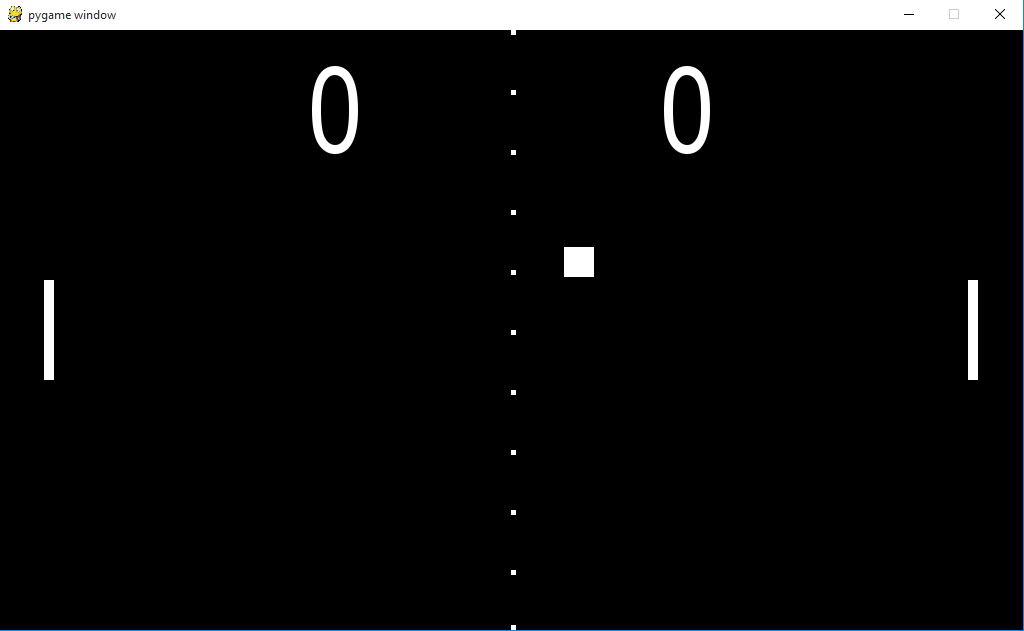

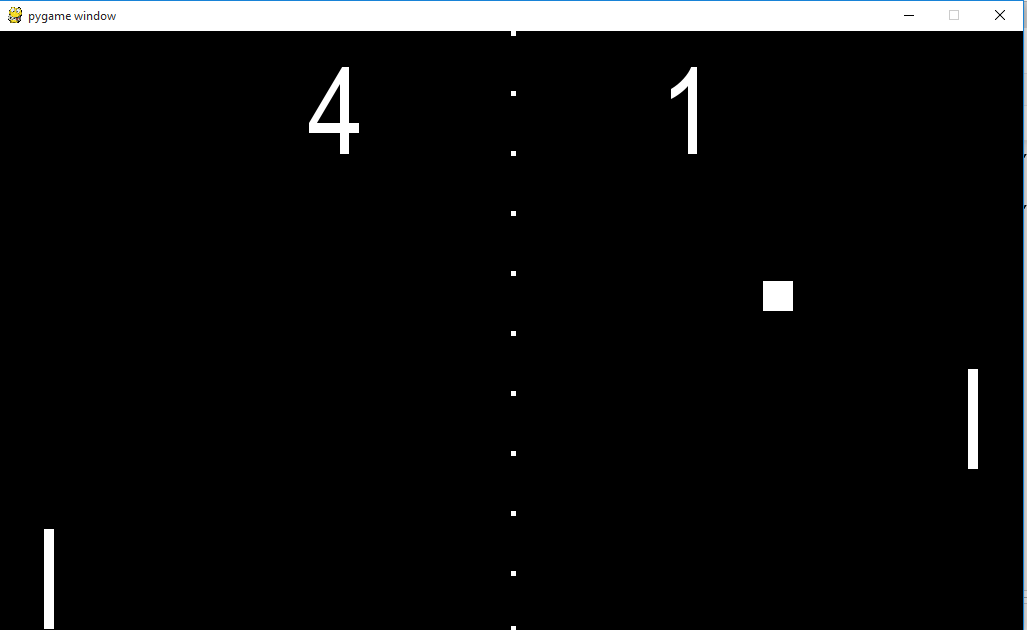

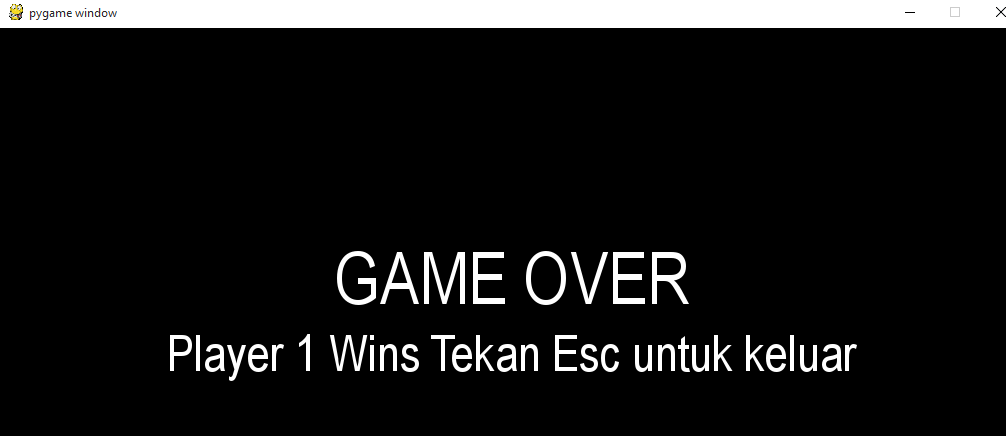